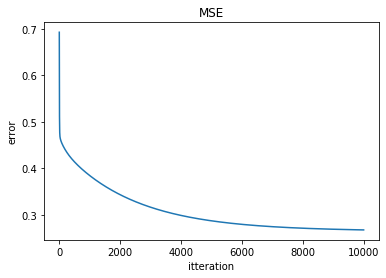

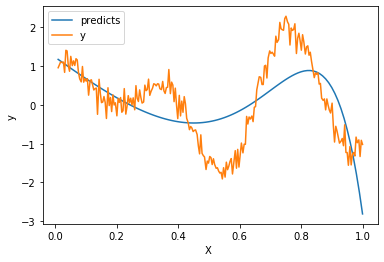

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv(r'C:\Users\Lenovo\Dataset.csv')
df=df.sample(frac=1)

def initialize_parameters(lenw):
    w=np.random.randn(1,lenw)
    b=0
    return w,b

def matrix_creator(input_vector, degree):
    output_matrix = []
    for i in range(degree):
        temp = []
        for el in input_vector:
            temp.append(el ** (i+1))
        output_matrix.append(temp)
    output_matrix
    return output_matrix

def forward_prob(x,w,b):
    z=np.dot(w,x)+b
    return z

def cost_function(z,y):
    m=y.shape[1]
    j=(1/(2*m))*np.sum(np.square(z-y))
    return j

def back_prob(x,y,z):
    m=y.shape[1]
    dz=(1/m)*(z-y)
    dw=np.dot(dz,x.T)
    db=np.sum(dz)
    return dw,db

def gradient_descent_update(w,b,dw,db,learning_rate):
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

def linear_regression_model_train(learning_rate,epochs,degree):
    train, validate, test = np.split(df, [int(.6*len(df)), int(.8*len(df))])
    x_train=train.x.to_numpy().reshape(1,-1)
    x_train= matrix_creator(x_train[0],degree)
    y_train = train.y.to_numpy().reshape(1,-1)
    lenw=degree
    w,b=initialize_parameters(lenw)
    costs_train= []
    for i in range(1,epochs+1):
        z_train=forward_prob(x_train,w,b)
        cost_train=cost_function(z_train,y_train)
        x_train = np.asarray(x_train)
        dw,db=back_prob(x_train,y_train,z_train)
        w,b=gradient_descent_update(w,b,dw,db,learning_rate)
        costs_train.append(cost_train)
    return costs_train, w ,z_train,b


def plot_MSE(cost_list): 
    plt.plot(cost_list)
    plt.title('MSE')
    plt.xlabel("itteration")
    plt.ylabel("error")
    plt.show()

# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# l=(1,2,3,4,5,6,7,8)
# l=np.asarray(l)
# plt.title('without regularization')
# ax.plot(l.T, w.T,color='tab:orange',label='amount')
# ax.set_xlabel('coefficient ')
# ax.set_ylabel('amount ')
# plt.show()

x=[]
init = 0.01
for i in range(100):
    x.append(init)
    init += 0.01
    
x_plot=matrix_creator(x,10)   

cost_train,w, z,b = linear_regression_model_train(0.07,10000,10)
plot_MSE(cost_train)
z_out= forward_prob(x_plot,w,b)

df=pd.read_csv(r'C:\Users\Lenovo\Dataset.csv')
x_train=df.x.to_numpy().reshape(1,-1)
y_train = df.y.to_numpy().reshape(1,-1)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(np.asarray(x), z_out.T, color='tab:blue',label='predicts')
ax.plot(x_train.T, y_train.T,color='tab:orange',label='y')
ax.set_xlabel('X ')
ax.set_ylabel('y ')
ax.legend()
plt.show()